In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import re

In [5]:
pd.set_option('display.max_columns',None)

In [9]:
df_main = pd.read_csv("ShowcaseDataWinter2023.csv")
df_main.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Premium,E,Red,2.0L,4,27.0,33.0,152,16.0,2001.0,200k+ miles,AIH,AIH_32,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,3.5L,6,19.0,27.0,285,18.0,1996.0,0 to 10k miles,KQZ,KQZ_3,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Premium,E,Black,2.5L,4,24.0,30.0,187,15.0,2014.0,10k to 20k miles,CIP,CIP_16,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,$5k to $10k,1.0,2014.0,15k to 20k miles,IZA,IZA_19,Premium,F,Silver,2.0L,4,25.0,34.0,255,15.0,2006.0,100k to 110k miles,IZA,NaN,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,2.5L,4,17.0,23.0,305,15.0,2011.0,20k to 30k miles,LTX,LTX_20,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16


# Ordinal
- price [x]
- appraisal_offer [x]
- mileage [x]
- mileage_appraisal [x]

# Boolean
- online_appraisal_flag [x]
- trim_descrip [x]
- trim_descrip_appraisal [x]

# Numerical
- model_year [x]
- model_year_appraisal [x]
- engine []
- engine_appraisal []
- cylinders []
- cylinders_appraisal []
- mpg_city []
- mpg_city_appraisal []
- mpg_highway []
- mog_highway_appraisal []mileage
- horsepower []
- horsepower_appraisal []
- fuel_capacity []
- fuel_capacity_appraisal []

# Categorical (OHE)
- make [x]
- make_appraisal [x]
- model [x]
- model_appraisal [x]
- body [x]
- body_appraisal [x]
- color []
- color_appraisal []
- market [x]

# Drop NaNs

In [17]:
df = df_main.copy().dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128683 entries, 1 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    128683 non-null  object 
 1   appraisal_offer          128683 non-null  object 
 2   online_appraisal_flag    128683 non-null  float64
 3   model_year               128683 non-null  float64
 4   mileage                  128683 non-null  object 
 5   make                     128683 non-null  object 
 6   model                    128683 non-null  object 
 7   trim_descrip             128683 non-null  object 
 8   body                     128683 non-null  object 
 9   color                    128683 non-null  object 
 10  engine                   128683 non-null  object 
 11  cylinders                128683 non-null  int64  
 12  mpg_city                 128683 non-null  float64
 13  mpg_highway              128683 non-null  float64
 14  hors

In [18]:
def convertCols(df=df):
    
    df['online_appraisal_flag'] = df['online_appraisal_flag'].astype('int')
    df['model_year'] = df['model_year'].astype('int')
    df['model_year_appraisal'] = df['model_year_appraisal'].astype('int')
    
    trim_bool = {
        'Premium': 1,
        'Not Premium': 0
    }
    
    df['model'] = [int(re.findall(r'\d+',i)[0]) for i in df['model']]
    df['model_appraisal'] = [int(re.findall(r'\d+',i)[0]) for i in df['model_appraisal']] 
    
    df['trim_descrip'] = df['trim_descrip'].map(trim_bool)
    df['trim_descrip_appraisal'] = df['trim_descrip_appraisal'].map(trim_bool)
    
    df['engine'] = [float(i.replace('L','')) for i in df['engine']]
    df['engine_appraisal'] = [float(i.replace('L','')) for i in df['engine_appraisal']]
    
    return df

from sklearn.preprocessing import OrdinalEncoder

def encodeVariables(col, df=df):
    # in order to automate the ordering, extract the first set of numbers and order by ascending
    if col == 'price':
        categories = ['$0 to $15k','$15k to $20k', '$20k to $25k','$25k to $30k','$30k to $35k', '$35k to $40k', 
        '$40k to $45k',  '$45k to $50k','$50k to $55k','$55k to $60k','$60k to $65k','$65k to $70k','$70k+']
    elif col == 'appraisal_offer':
        categories = ['$0k to $5k','$5k to $10k','$10k to $15k','$15k to $20k','$20k to $25k','$25k to $30k','$30k to $35k','$35k to $40k','$40k+']
    elif col == 'mileage':
        categories = ['0 to 5k miles','5k to 10k miles', '10k to 15k miles','15k to 20k miles','20k to 25k miles','25k to 30k miles','30k to 35k miles', '35k to 40k miles','40k to 45k miles', 
                      '45k to 50k miles','50k to 55k miles','55k to 60k miles','60k to 65k miles','65k to 70k miles','70k to 75k miles','75k to 80k miles','80k to 85k miles','85k to 90k miles',
                      '90k to 95k miles','95k to 100k miles','100k+ miles']
    elif col == 'mileage_appraisal':
        categories = ['0 to 10k miles','10k to 20k miles','20k to 30k miles','30k to 40k miles','40k to 50k miles','50k to 60k miles','60k to 70k miles','70k to 80k miles','80k to 90k miles', 
                      '90k to 100k miles','100k to 110k miles','110k to 120k miles','120k to 130k miles', '130k to 140k miles','140k to 150k miles','150k to 160k miles','160k to 170k miles',
                      '170k to 180k miles','180k to 190k miles','190k to 200k miles','200k+ miles']
    
    enc = OrdinalEncoder(categories=[categories])
    # print(enc)
    encoded_list = enc.fit_transform(df[col].values.reshape(-1,1))
    
    return encoded_list

def encodeDF(df):
    
    df['price'] = encodeVariables('price')
    df['appraisal_offer'] = encodeVariables('appraisal_offer')
    df['mileage'] = encodeVariables('mileage')
    df['mileage_appraisal'] = encodeVariables('mileage_appraisal')
    
    return df

In [20]:
df = convertCols(df)
df = encodeDF(df)
df

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
1,1.0,0.0,0,2006,20.0,KQZ,23,1,E,Silver,3.5,6,19.0,27.0,285,18.0,1996,0.0,KQZ,3,0,D,Gold,4.2,6,16.0,21,205,25.0,11
4,4.0,3.0,1,2011,7.0,HDT,8,1,F,Blue,2.5,4,17.0,23.0,305,15.0,2011,2.0,LTX,20,0,E,Black,2.4,4,20.0,29,182,18.0,16
5,1.0,1.0,0,2013,7.0,OFW,11,0,F,White,2.4,4,25.0,35.0,185,18.0,2009,16.0,FJE,10,0,F,Black,3.6,6,18.0,27,292,19.0,10
6,5.0,8.0,0,2013,4.0,LTX,21,1,B,Blue,6.2,8,16.0,25.0,455,19.0,2012,3.0,LTX,27,0,B,Black,6.2,8,16.0,25,455,18.0,8
7,1.0,1.0,0,2012,6.0,LTX,30,0,E,Black,1.4,4,24.0,30.0,138,14.0,2010,8.0,HXQ,8,0,F,Silver,1.8,4,30.0,39,143,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,3.0,1,2013,2.0,OFW,6,1,F,Black,2.0,4,28.0,37.0,147,14.0,2015,0.0,LTX,30,0,E,Black,1.4,4,26.0,31,138,14.0,1
199996,2.0,2.0,0,2014,11.0,ARU,12,0,F,White,2.5,4,27.0,37.0,182,16.0,2010,5.0,HXQ,8,0,B,Black,1.8,4,30.0,39,143,13.0,8
199997,4.0,0.0,0,2014,2.0,AIH,13,1,F,Silver,2.5,4,28.0,39.0,206,16.0,2004,12.0,HXQ,14,0,F,Gray,2.4,4,21.0,30,177,18.0,3
199998,4.0,2.0,0,2012,10.0,KQZ,3,0,D,Black,3.5,6,17.0,23.0,282,23.0,2006,13.0,BZQ,4,1,D,White,5.7,8,13.0,19,390,26.0,11


# Groupby Market

In [91]:
df.groupby('market')['market'].count()

market
1      9159
2      7368
3      3987
4     10717
5      8962
6      7570
7      9137
8     10494
9      9092
10     8758
11     9579
12     4850
13     3224
14    12676
15     5954
16     7156
Name: market, dtype: int64

# Create average price, appraisal_offer, model_year, mileage, model_year_appraisal, mileage_appraisal

# Columns of interest:

In [23]:
col_interest = ['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal','market']

# Group df by most sold make and only include interesting columns

In [92]:
sub_df = df.copy().loc[:,col_interest]
sold_bought = list(zip(sub_df['make_appraisal'],sub_df['make']))
sold_group = sub_df.groupby('make_appraisal')

In [89]:
sub_df.groupby('make_appraisal')['make_appraisal'].count().sort_values(ascending=False)[:10]

make_appraisal
LTX    17281
KQZ    17277
ARU    16260
AIH    13920
HXQ    11097
CFK     9620
OFW     8311
FJE     6941
BGZ     6072
FVQ     3665
Name: make_appraisal, dtype: int64

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'appraisal_offer'}>,
        <AxesSubplot: title={'center': 'online_appraisal_flag'}>],
       [<AxesSubplot: title={'center': 'model_year'}>,
        <AxesSubplot: title={'center': 'mileage'}>,
        <AxesSubplot: title={'center': 'model'}>],
       [<AxesSubplot: title={'center': 'trim_descrip'}>,
        <AxesSubplot: title={'center': 'model_year_appraisal'}>,
        <AxesSubplot: title={'center': 'mileage_appraisal'}>],
       [<AxesSubplot: title={'center': 'model_appraisal'}>,
        <AxesSubplot: title={'center': 'trim_descrip_appraisal'}>,
        <AxesSubplot: title={'center': 'market'}>]], dtype=object)

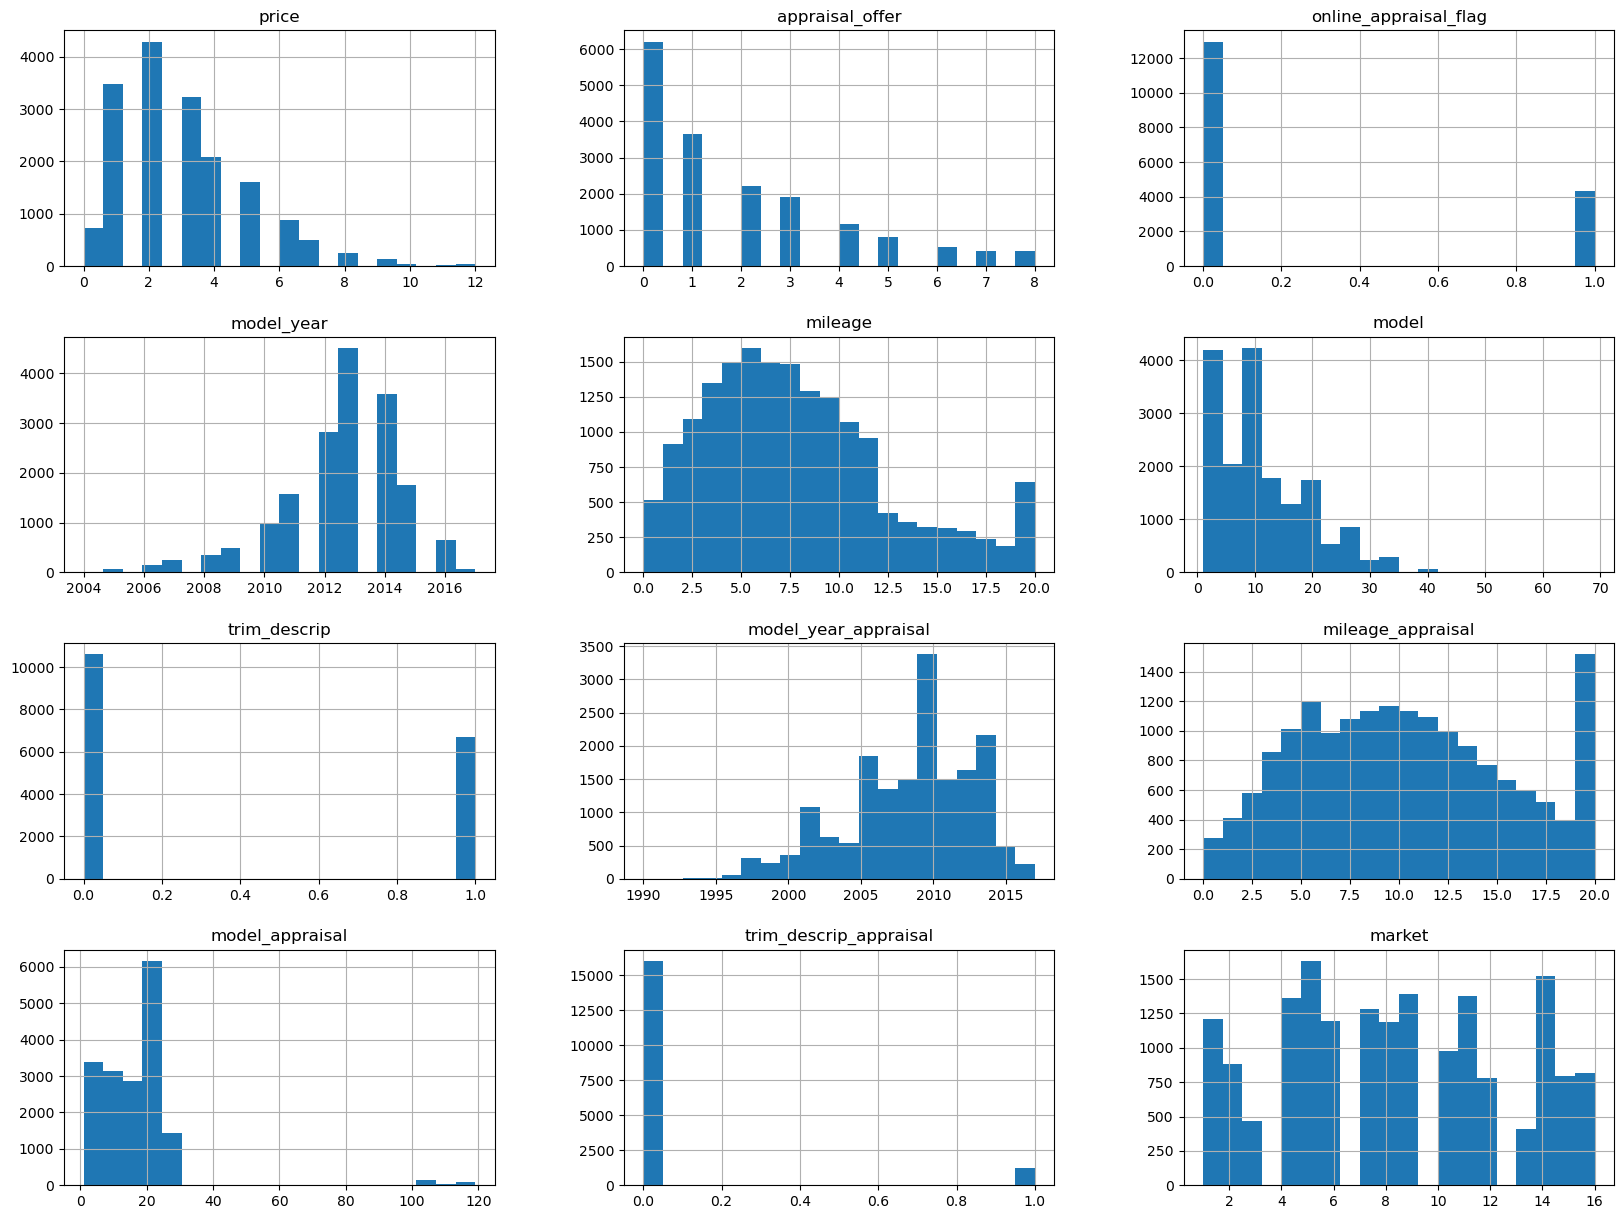

In [93]:
LTX = sold_group.get_group('LTX')
LTX.hist(bins=20, figsize=(20,15))

# Group df by bought make and include only interesting columns

In [54]:
grouped_df = sub_df.groupby('make')

# The most common car sold and then purchased

In [56]:
from collections import Counter

sb_counter = Counter(sold_bought)

In [80]:
sb_counter.most_common()[:10]

[(('AIH', 'AIH'), 4667),
 (('KQZ', 'KQZ'), 3800),
 (('LTX', 'LTX'), 3475),
 (('HXQ', 'HXQ'), 3108),
 (('ARU', 'ARU'), 2961),
 (('CFK', 'CFK'), 2247),
 (('ARU', 'AIH'), 2166),
 (('KQZ', 'AIH'), 1995),
 (('LTX', 'AIH'), 1919),
 (('ARU', 'HXQ'), 1809)]

# Most commonly purchased 'make'

In [50]:
sub_df.groupby('make')['make'].count().sort_values(ascending=False)[:5]

make
AIH    18529
HXQ    14573
LTX    12830
KQZ    12815
ARU    12777
Name: make, dtype: int64

# Most commonly sold 'make'

In [51]:
sub_df.groupby('make_appraisal')['make_appraisal'].count().sort_values(ascending=False)[:5]

make_appraisal
LTX    17281
KQZ    17277
ARU    16260
AIH    13920
HXQ    11097
Name: make_appraisal, dtype: int64

# Analyzing most popular purchased car make, AIH

In [82]:
AIH = grouped_df.get_group('AIH')
AIH.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,market
24,5.0,3.0,1,2014,6.0,AIH,27,1,E,2014,4.0,BGZ,6,0,F,9
34,5.0,2.0,0,2012,15.0,AIH,8,1,D,2004,9.0,LTX,9,0,D,5
40,0.0,0.0,0,2014,7.0,AIH,25,0,F,2000,17.0,HXQ,14,0,F,16
59,1.0,0.0,0,2011,10.0,AIH,28,0,F,2000,20.0,LTX,118,0,G,9
65,3.0,0.0,0,2015,9.0,AIH,13,0,F,2001,15.0,AIH,13,0,F,10


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'appraisal_offer'}>,
        <AxesSubplot: title={'center': 'online_appraisal_flag'}>],
       [<AxesSubplot: title={'center': 'model_year'}>,
        <AxesSubplot: title={'center': 'mileage'}>,
        <AxesSubplot: title={'center': 'model'}>],
       [<AxesSubplot: title={'center': 'trim_descrip'}>,
        <AxesSubplot: title={'center': 'model_year_appraisal'}>,
        <AxesSubplot: title={'center': 'mileage_appraisal'}>],
       [<AxesSubplot: title={'center': 'model_appraisal'}>,
        <AxesSubplot: title={'center': 'trim_descrip_appraisal'}>,
        <AxesSubplot: title={'center': 'market'}>]], dtype=object)

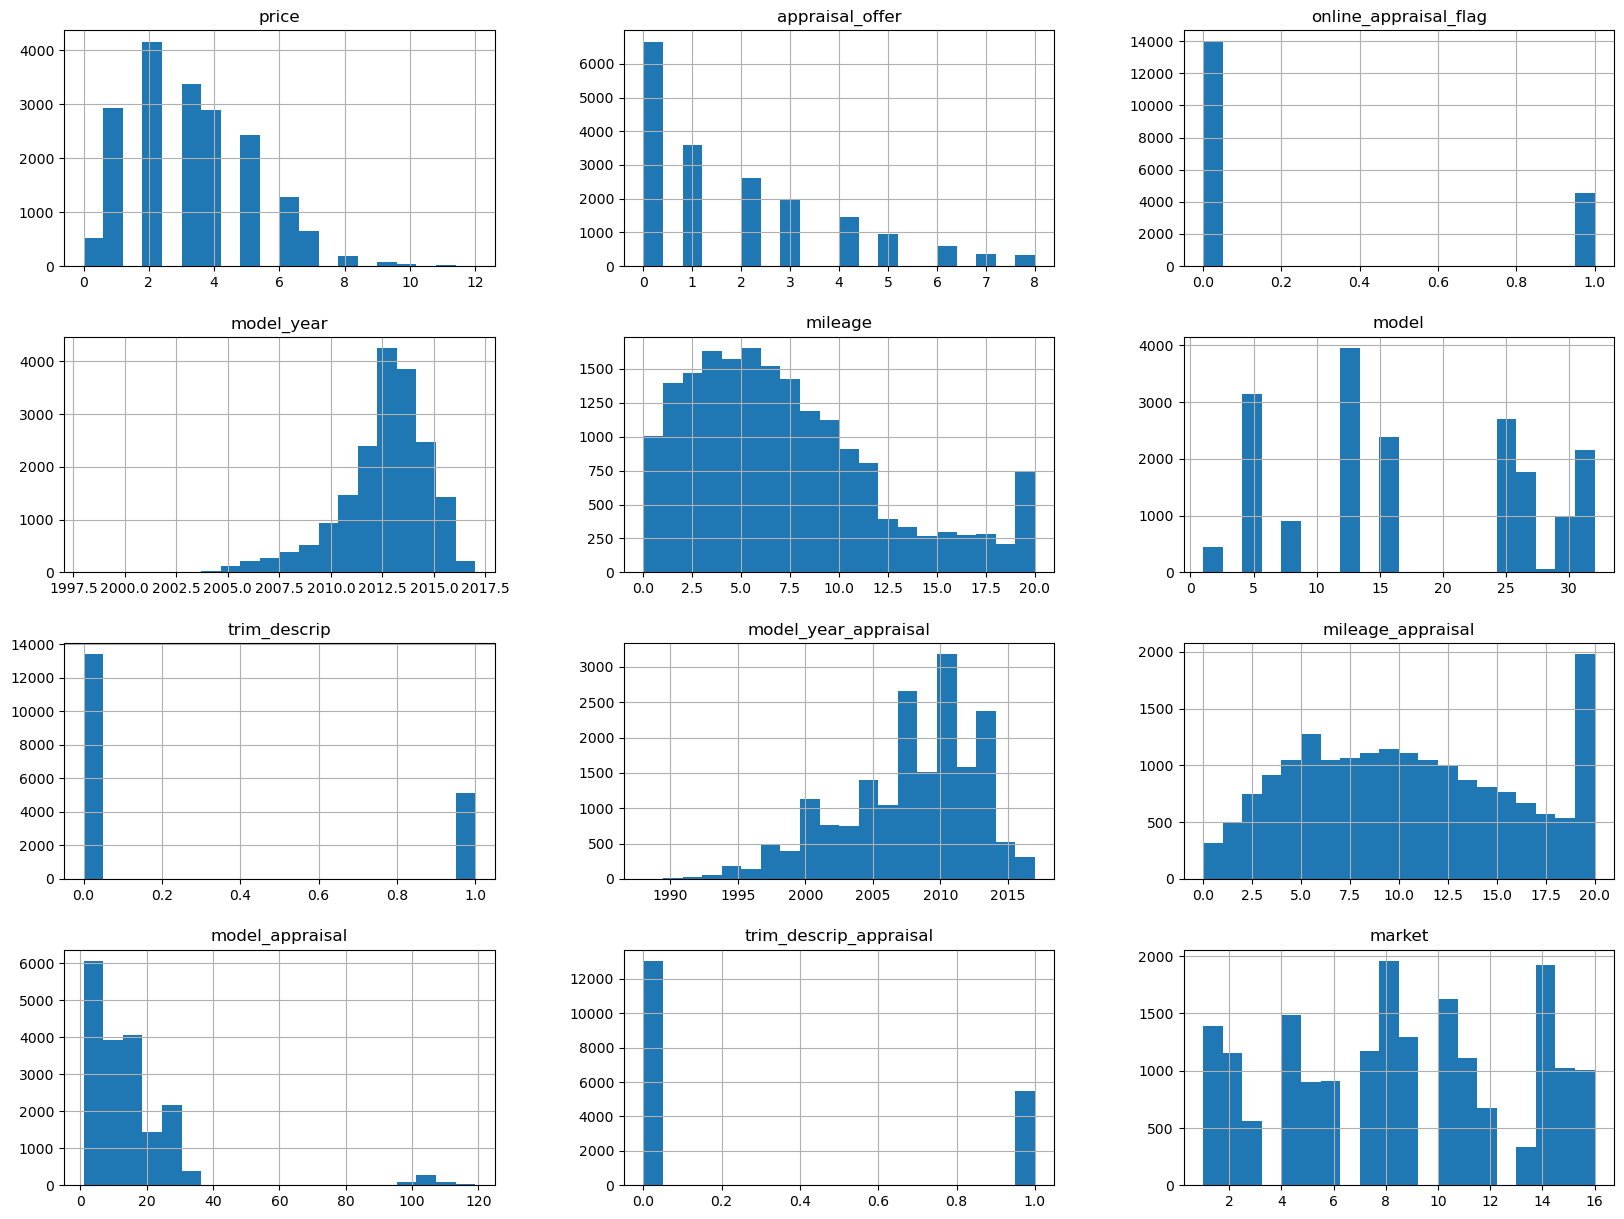

In [86]:
AIH.hist(bins=20, figsize=(20,15))

In [39]:
list_of_makes = loyalty_df['make'].unique()
list_of_makes

array(['KQZ', 'LTX', 'FVQ', 'ARU', 'AIH', 'HXQ', 'CFK', 'FJE', 'BGZ',
       'OFW', 'BZQ', 'JHO', 'BXO', 'CZV', 'HDT', 'NKR', 'BDP', 'JJQ',
       'HAE', 'GUK', 'NYP', 'FPH', 'CIP', 'LYP', 'JDZ', 'MBN', 'IZA',
       'HYS', 'JGV', 'KDM', 'FJR', 'HAN'], dtype=object)

In [63]:
for i in list_of_makes:
    print(len(grouped_make.get_group(i)),i)

3800 KQZ
3475 LTX
441 FVQ
2961 ARU
4667 AIH
3108 HXQ
2247 CFK
956 FJE
486 BGZ
1133 OFW
428 BZQ
358 JHO
252 BXO
246 CZV
335 HDT
125 NKR
35 BDP
23 JJQ
23 HAE
36 GUK
4 NYP
19 FPH
44 CIP
16 LYP
12 JDZ
3 MBN
5 IZA
1 HYS
1 JGV
1 KDM
1 FJR
2 HAN


# Things to do:

- Price and appraisal_offer seem to be the 'target' type columns

- Depending on binary record 'online_apprasial_flag', should all feature columns be verified with the online and appraisal values?

- Convert relevant string data into numerical 
    - price
    - appraisal_offer
    - mileage
    - milage_appraisal
    
- Change the following data types
    - online_appraisal_flag -> to int
    - model_year -> to int
    - enging -> to int (given all values in X.XL format)
    
- Make/Model abbreviations are not trivial
- Check for NaNs on all columns
- 'Market' is a categorical variable?

# RUN BELOW CELL TO RESET DF

## Visualize NaNs

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'price'),
  Text(1, 0, 'appraisal_offer'),
  Text(2, 0, 'online_appraisal_flag'),
  Text(3, 0, 'model_year'),
  Text(4, 0, 'mileage'),
  Text(5, 0, 'make'),
  Text(6, 0, 'model'),
  Text(7, 0, 'trim_descrip'),
  Text(8, 0, 'body'),
  Text(9, 0, 'color'),
  Text(10, 0, 'engine'),
  Text(11, 0, 'cylinders'),
  Text(12, 0, 'mpg_city'),
  Text(13, 0, 'mpg_highway'),
  Text(14, 0, 'horsepower'),
  Text(15, 0, 'fuel_capacity'),
  Text(16, 0, 'model_year_appraisal'),
  Text(17, 0, 'mileage_appraisal'),
  Text(18, 0, 'make_appraisal'),
  Text(19, 0, 'model_appraisal'),
  Text(20, 0, 'trim_descrip_appraisal'),
  Text(21, 0, 'body_appraisal'),
  Text(22, 0, 'color_appraisal'),
  Text(23, 0, 'engine_appraisal'),
  Text(24, 0, 'cylinders_appraisal'),
  Text(25, 0, 'mpg_city_appraisal'),
  Text(26, 0, 'mpg_highway_app

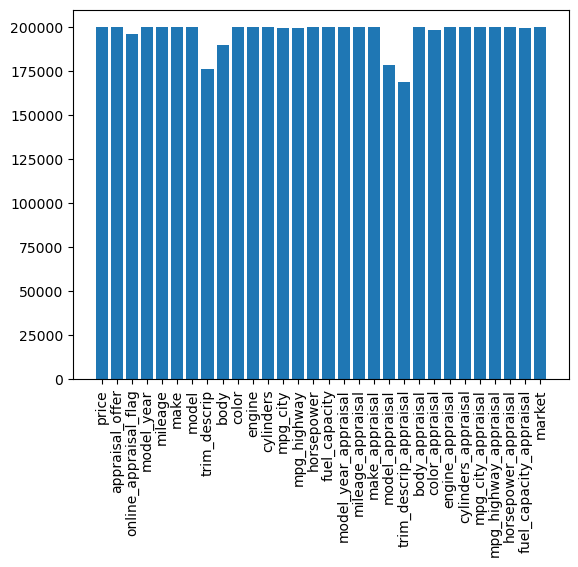

In [33]:
plt.bar(df_main.count().keys(), df_main.count().values)
plt.xticks(rotation = 90)

In [34]:
df_wnans = df_main.copy() 
df = df_main.copy().dropna()
df

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,3.5L,6,19.0,27.0,285,18.0,1996.0,0 to 10k miles,KQZ,KQZ_3,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,2.5L,4,17.0,23.0,305,15.0,2011.0,20k to 30k miles,LTX,LTX_20,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16
5,$15k to $20k,$5k to $10k,0.0,2013.0,35k to 40k miles,OFW,OFW_11,Not Premium,F,White,2.4L,4,25.0,35.0,185,18.0,2009.0,160k to 170k miles,FJE,FJE_10,Not Premium,F,Black,3.6L,6,18.0,27,292,19.0,10
6,$35k to $40k,$40k+,0.0,2013.0,20k to 25k miles,LTX,LTX_21,Premium,B,Blue,6.2L,8,16.0,25.0,455,19.0,2012.0,30k to 40k miles,LTX,LTX_27,Not Premium,B,Black,6.2L,8,16.0,25,455,18.0,8
7,$15k to $20k,$5k to $10k,0.0,2012.0,30k to 35k miles,LTX,LTX_30,Not Premium,E,Black,1.4L,4,24.0,30.0,138,14.0,2010.0,80k to 90k miles,HXQ,HXQ_8,Not Premium,F,Silver,1.8L,4,30.0,39,143,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,$15k to $20k,1.0,2013.0,10k to 15k miles,OFW,OFW_6,Premium,F,Black,2.0L,4,28.0,37.0,147,14.0,2015.0,0 to 10k miles,LTX,LTX_30,Not Premium,E,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,$10k to $15k,0.0,2014.0,55k to 60k miles,ARU,ARU_12,Not Premium,F,White,2.5L,4,27.0,37.0,182,16.0,2010.0,50k to 60k miles,HXQ,HXQ_8,Not Premium,B,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,$0k to $5k,0.0,2014.0,10k to 15k miles,AIH,AIH_13,Premium,F,Silver,2.5L,4,28.0,39.0,206,16.0,2004.0,120k to 130k miles,HXQ,HXQ_14,Not Premium,F,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,$10k to $15k,0.0,2012.0,50k to 55k miles,KQZ,KQZ_3,Not Premium,D,Black,3.5L,6,17.0,23.0,282,23.0,2006.0,130k to 140k miles,BZQ,BZQ_4,Premium,D,White,5.7L,8,13.0,19,390,26.0,11


# Create ordinal encoding for variables such as price, appraisal_offer, mileage, mileage_appraisal

In [35]:
from sklearn.preprocessing import OrdinalEncoder

def encodeVariables(col, df):
    # in order to automate the ordering, extract the first set of numbers and order by ascending
    if col == 'price':
        categories = ['$0 to $15k','$15k to $20k', '$20k to $25k','$25k to $30k','$30k to $35k', '$35k to $40k', 
        '$40k to $45k',  '$45k to $50k','$50k to $55k','$55k to $60k','$60k to $65k','$65k to $70k','$70k+']
    elif col == 'appraisal_offer':
        categories = ['$0k to $5k','$5k to $10k','$10k to $15k','$15k to $20k','$20k to $25k','$25k to $30k','$30k to $35k','$35k to $40k','$40k+']
    elif col == 'mileage':
        categories = ['0 to 5k miles','5k to 10k miles', '10k to 15k miles','15k to 20k miles','20k to 25k miles','25k to 30k miles','30k to 35k miles', '35k to 40k miles','40k to 45k miles', 
                      '45k to 50k miles','50k to 55k miles','55k to 60k miles','60k to 65k miles','65k to 70k miles','70k to 75k miles','75k to 80k miles','80k to 85k miles','85k to 90k miles',
                      '90k to 95k miles','95k to 100k miles','100k+ miles']
    elif col == 'mileage_appraisal':
        categories = ['0 to 10k miles','10k to 20k miles','20k to 30k miles','30k to 40k miles','40k to 50k miles','50k to 60k miles','60k to 70k miles','70k to 80k miles','80k to 90k miles', 
                      '90k to 100k miles','100k to 110k miles','110k to 120k miles','120k to 130k miles', '130k to 140k miles','140k to 150k miles','150k to 160k miles','160k to 170k miles',
                      '170k to 180k miles','180k to 190k miles','190k to 200k miles','200k+ miles']
    
    enc = OrdinalEncoder(categories=[categories])
    # print(enc)
    encoded_list = enc.fit_transform(df[col].values.reshape(-1,1))
    
    return encoded_list

# Focusing in on staying loyal to the brand
## purchased make is same as appraised_make
## include just a few variables in the analysis
    - price
    - mileage
    - body style

In [36]:
loyalty_df = df.copy()
loyalty_df = loyalty_df[df['make'] == df['make_appraisal']]
# loyalty_df = loyalty_df[df['body'] == df['body_appraisal']]

loyalty_df['price'] = encodeVariables('price', loyalty_df)
loyalty_df['appraisal_offer'] = encodeVariables('appraisal_offer', loyalty_df)
loyalty_df['mileage'] = encodeVariables('mileage', loyalty_df)

loyalty_df['model'] = [int(re.findall(r'\d+',i)[0]) for i in loyalty_df['model']]
loyalty_df['model_appraisal'] = [int(re.findall(r'\d+',i)[0]) for i in loyalty_df['model_appraisal']]

# loyalty_df = loyalty_df[loyalty_df['model'] == loyalty_df['model_appraisal']]

loyalty_df['mileage_appraisal'] = encodeVariables('mileage_appraisal', loyalty_df)
loyalty_df

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
1,1.0,0.0,0.0,2006.0,20.0,KQZ,23,Premium,E,Silver,3.5L,6,19.0,27.0,285,18.0,1996.0,0.0,KQZ,3,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
6,5.0,8.0,0.0,2013.0,4.0,LTX,21,Premium,B,Blue,6.2L,8,16.0,25.0,455,19.0,2012.0,3.0,LTX,27,Not Premium,B,Black,6.2L,8,16.0,25,455,18.0,8
8,4.0,4.0,0.0,2013.0,7.0,FVQ,4,Premium,E,Black,3.6L,6,18.0,25.0,310,19.0,2010.0,6.0,FVQ,4,Premium,E,Black,3.6L,6,17.0,24,288,22.0,9
14,2.0,2.0,1.0,2015.0,0.0,ARU,14,Not Premium,E,White,2.0L,4,24.0,30.0,141,14.0,2011.0,3.0,ARU,4,Not Premium,E,Black,2.5L,4,25.0,32,170,14.0,3
16,1.0,0.0,0.0,2010.0,16.0,KQZ,23,Not Premium,E,Gray,2.0L,4,20.0,28.0,245,18.0,2005.0,19.0,KQZ,23,Premium,E,Black,3.5L,6,18.0,25,265,19.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199957,5.0,2.0,0.0,2014.0,5.0,HDT,8,Premium,F,White,2.5L,4,17.0,22.0,310,15.0,2010.0,6.0,HDT,10,Premium,F,Gray,2.5L,4,26.0,36,175,18.0,11
199959,3.0,4.0,0.0,2014.0,13.0,LTX,12,Not Premium,D,White,3.6L,6,18.0,25.0,308,21.0,2013.0,5.0,LTX,12,Not Premium,D,White,2.5L,4,20.0,26,200,21.0,15
199973,7.0,4.0,0.0,2014.0,7.0,BZQ,4,Premium,D,Black,5.7L,8,19.0,24.0,395,26.0,2010.0,8.0,BZQ,4,Not Premium,D,Blue,3.6L,6,16.0,23,305,26.0,6
199974,3.0,2.0,0.0,2013.0,4.0,HXQ,14,Premium,F,Gray,1.5L,4,29.0,35.0,192,14.0,2009.0,11.0,HXQ,14,Premium,F,Silver,2.4L,4,27.0,36,185,17.0,9


In [37]:
loyalty_df.columns

Index(['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity',
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal',
       'color_appraisal', 'engine_appraisal', 'cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal', 'market'],
      dtype='object')

In [38]:
loyalty_small = loyalty_df.loc[:,['price','appraisal_offer','model_year','mileage','model_year_appraisal','mileage_appraisal','cylinders_appraisal','horsepower_appraisal']]
loyalty_small['model_year'] = loyalty_small['model_year'].astype('int')
loyalty_small['model_year_appraisal'] = loyalty_small['model_year_appraisal'].astype('int')
# loyalty_small['body_appraisal'] = encodeVariables('body_appraisal',loyalty_df)
loyalty_small.head()

,price,appraisal_offer,model_year,mileage,model_year_appraisal,mileage_appraisal,cylinders_appraisal,horsepower_appraisal
1,1.0,0.0,2006,20.0,1996,0.0,6,205
6,5.0,8.0,2013,4.0,2012,3.0,8,455
8,4.0,4.0,2013,7.0,2010,6.0,6,288
14,2.0,2.0,2015,0.0,2011,3.0,4,170
16,1.0,0.0,2010,16.0,2005,19.0,6,265


In [39]:
list_of_makes = loyalty_df['make'].unique()
list_of_makes

array(['KQZ', 'LTX', 'FVQ', 'ARU', 'AIH', 'HXQ', 'CFK', 'FJE', 'BGZ',
       'OFW', 'BZQ', 'JHO', 'BXO', 'CZV', 'HDT', 'NKR', 'BDP', 'JJQ',
       'HAE', 'GUK', 'NYP', 'FPH', 'CIP', 'LYP', 'JDZ', 'MBN', 'IZA',
       'HYS', 'JGV', 'KDM', 'FJR', 'HAN'], dtype=object)

In [63]:
for i in list_of_makes:
    print(len(grouped_make.get_group(i)),i)

3800 KQZ
3475 LTX
441 FVQ
2961 ARU
4667 AIH
3108 HXQ
2247 CFK
956 FJE
486 BGZ
1133 OFW
428 BZQ
358 JHO
252 BXO
246 CZV
335 HDT
125 NKR
35 BDP
23 JJQ
23 HAE
36 GUK
4 NYP
19 FPH
44 CIP
16 LYP
12 JDZ
3 MBN
5 IZA
1 HYS
1 JGV
1 KDM
1 FJR
2 HAN


3040 760
[20:54:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


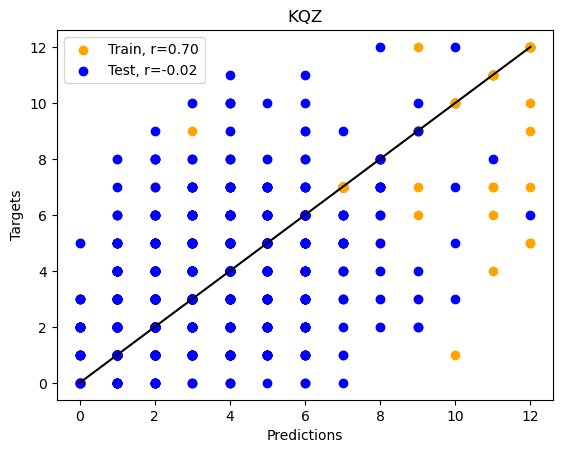

2780 695
[20:54:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


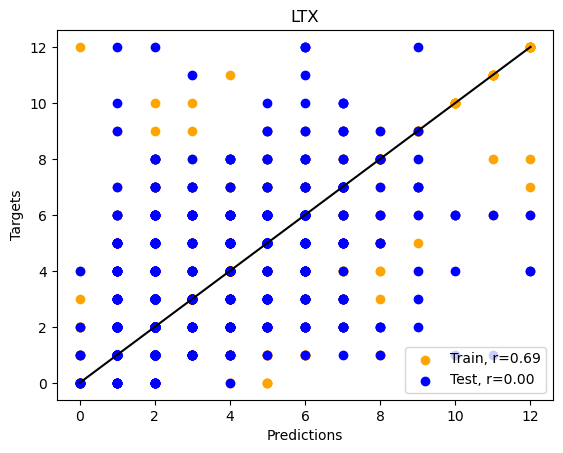

352 89
[20:54:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


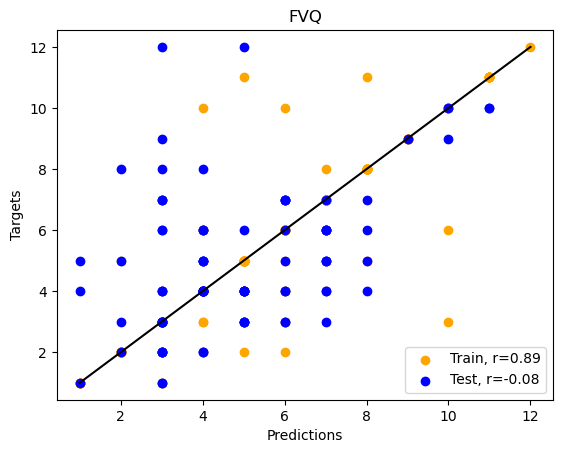

2368 593
[20:54:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


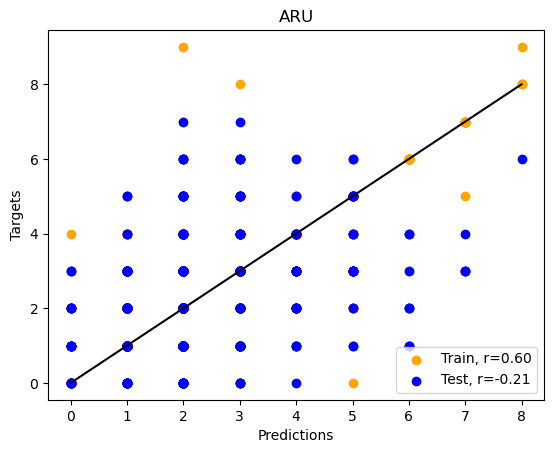

3733 934
[20:54:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


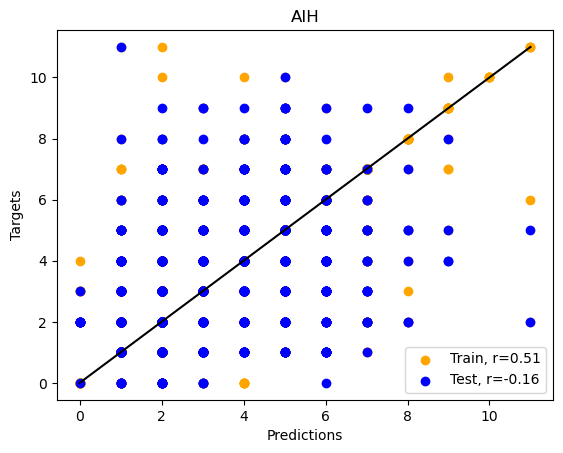

2486 622
[20:54:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


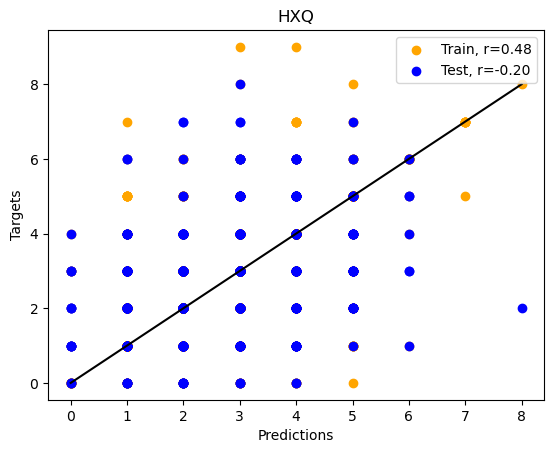

1797 450
[20:54:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


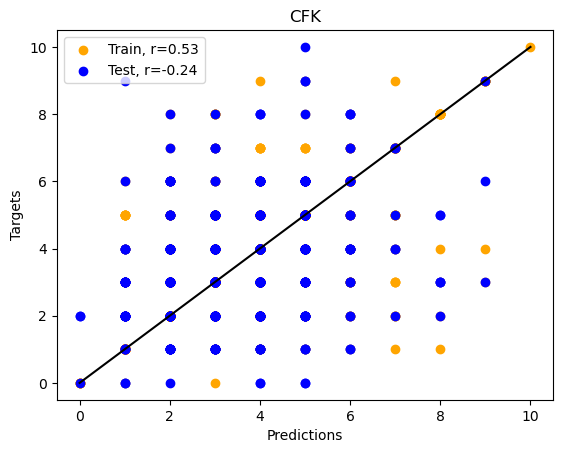

764 192
[20:54:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


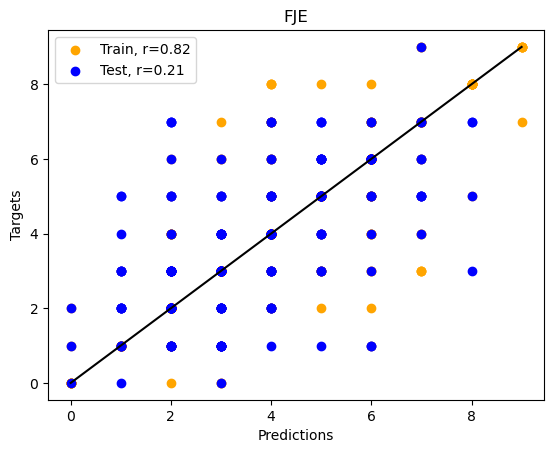

388 98
[20:54:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


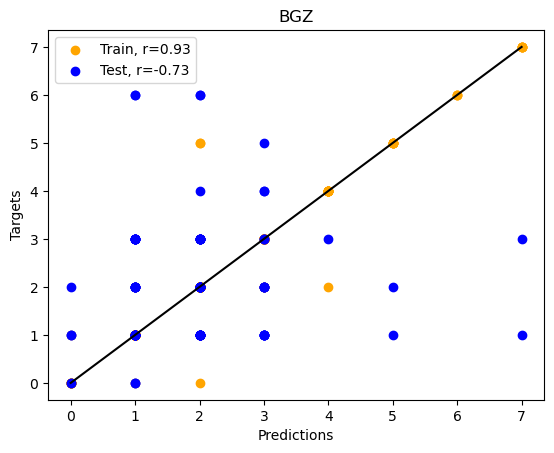

906 227
[20:54:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


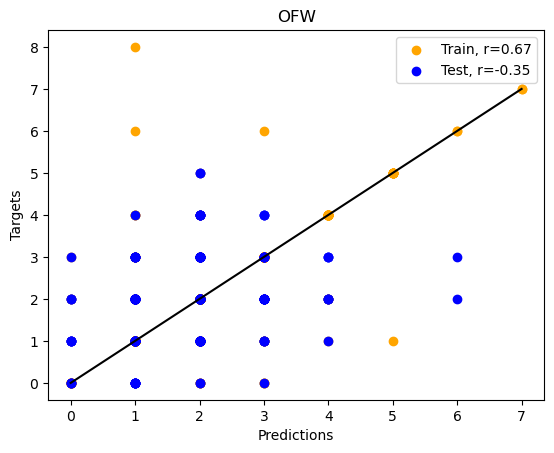

342 86
[20:54:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


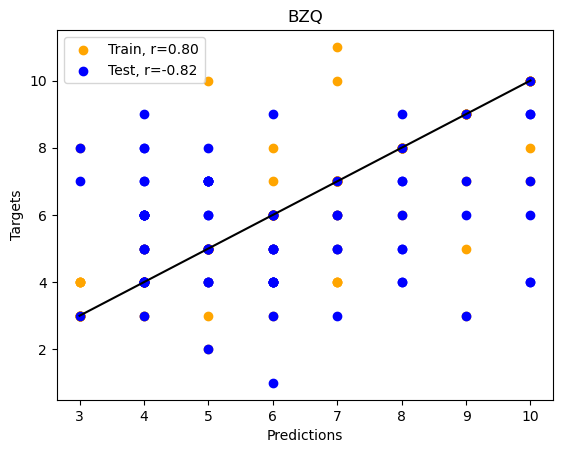

286 72
[20:54:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


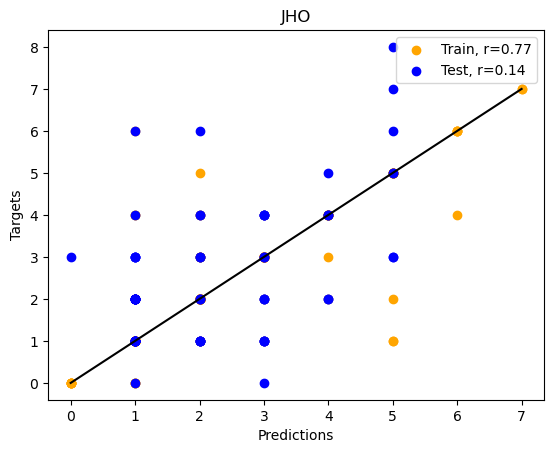

201 51
[20:54:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


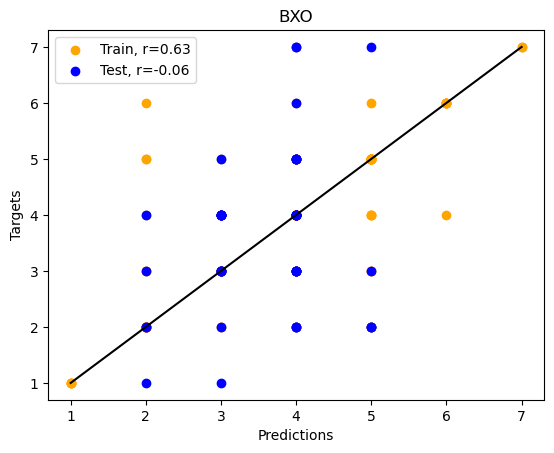

196 50
[20:54:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


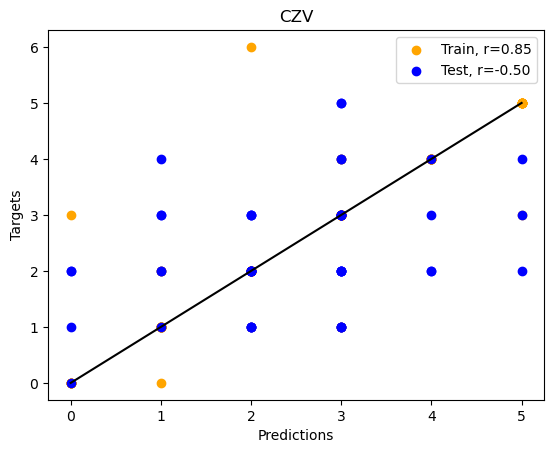

268 67
[20:54:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


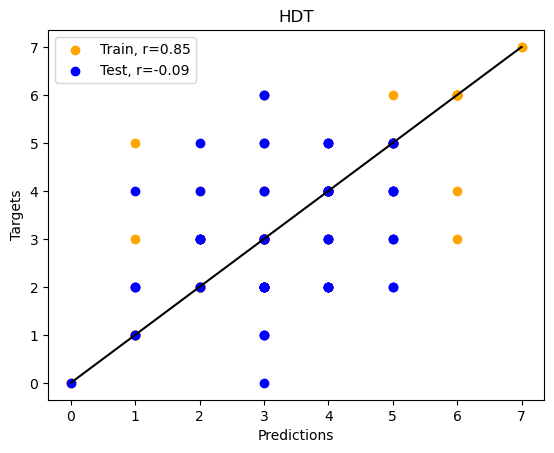

100 25
[20:54:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


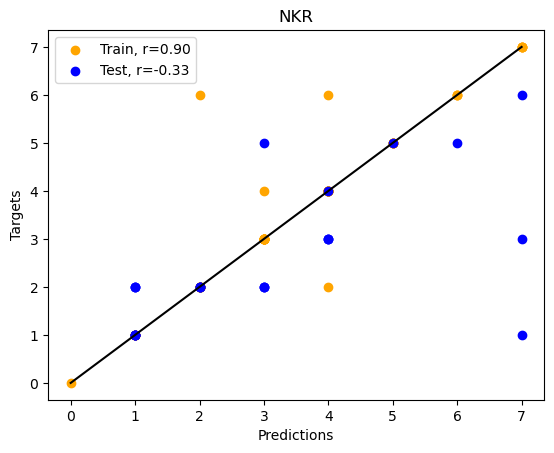

28 7
[20:54:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


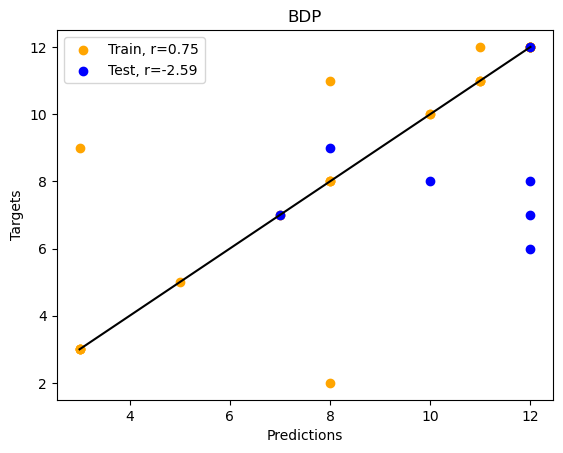

18 5
[20:54:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


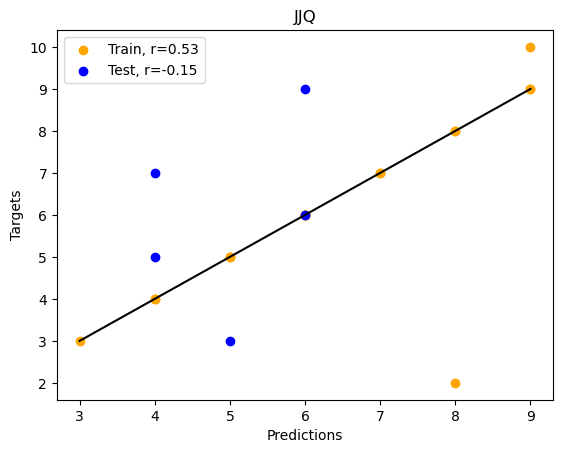

18 5
[20:54:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


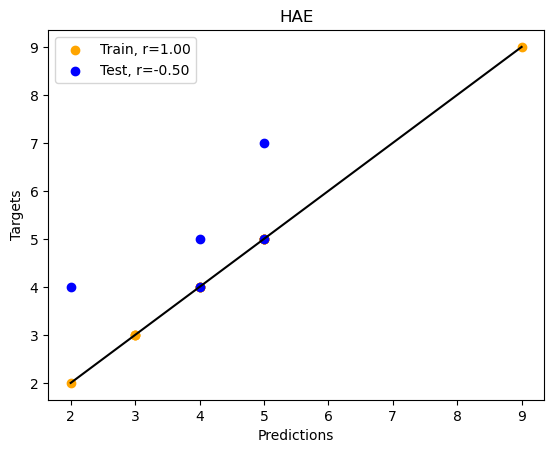

28 8
[20:54:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


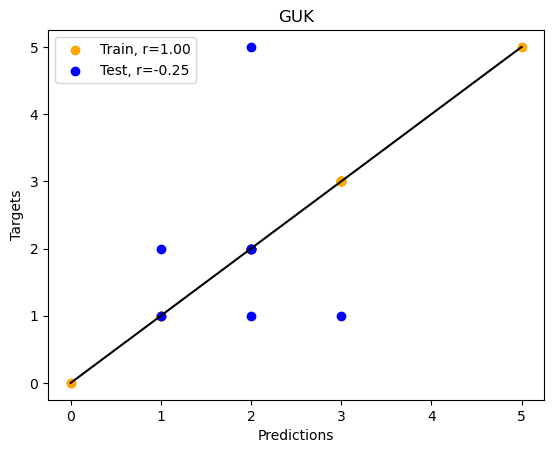

3 1


In [40]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

grouped_make = loyalty_df.groupby('make')

for i in list_of_makes:

    grouped_loyalty = grouped_make.get_group(i)

    # Load the data
    X = grouped_loyalty.loc[:,['appraisal_offer','model_year_appraisal','mileage_appraisal','cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal']] # features
    y = grouped_loyalty['price'] # targets

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    print(len(X_train), len(X_test))
    if len(X_test) < 2:
        break

    # Create the decision tree model
    # model = DecisionTreeClassifier()
#     model = RandomForestRegressor()
#     # model = RandomForestClassifier()

#     # Fit the model to the train data
#     model.fit(X_train, y_train)
    dt = xgb.DMatrix(X_train, label=y_train)
    dv = xgb.DMatrix(X_test, label=y_test)
    
    # params = {
    #     "eta": 0.5,
    #     "max_depth": 4,
    #     "objective": "reg:squarederror",
    #     "silent": 0,
    #     "base_score": np.mean(y_test),
    #     "eval_metric": "rmse"
    # }
    # model = xgb.train(params, dt, 300, [(dt, "train"),(dv, "valid")], early_stopping_rounds=10, verbose_eval=25)
    
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    
    # predictions = model.predict(dv)


    # Make predictions on the train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    # train_predictions = model.predict(dt)
    # test_predictions = model.predict(dv)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Plot the actual vs predicted values
    def plot_predictions(train_predictions, train_targets, test_predictions, test_targets):
        plt.scatter(train_predictions, train_targets, label=f'Train, r={train_r2:.2f}',c='orange')
        plt.scatter(test_predictions, test_targets, label=f'Test, r={test_r2:.2f}',c='blue')
        plt.plot([min(min(train_predictions),min(test_predictions)), max(max(train_predictions),max(test_predictions))], 
                 [min(min(train_predictions),min(test_predictions)), max(max(train_predictions), max(test_predictions))], color='black')
        plt.xlabel('Predictions')
        plt.ylabel('Targets')
        plt.title(i)
        plt.legend()
        plt.show()

    plot_predictions(train_predictions, y_train, test_predictions, y_test)


In [ ]:
sns.

In [58]:
KQZ = grouped_make.get_group('KQZ')
KQZ = KQZ[KQZ['model'] == KQZ['model_appraisal']]

C:\Users\Ash\AppData\Local\Temp\ipykernel_11448\3464017535.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(KQZ.corr())


<AxesSubplot: >

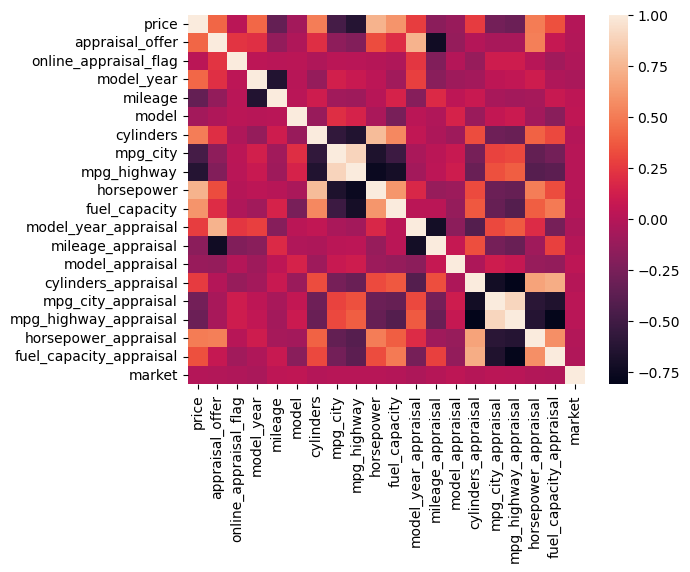

In [51]:
# KQZ.plot(kind='scatter',x='price',y='appraisal_offer',alpha=0.1)
import seaborn as sns

sns.heatmap(KQZ.corr())

array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='appraisal_offer', ylabel='price'>,
        <AxesSubplot: xlabel='model_year', ylabel='price'>,
        <AxesSubplot: xlabel='mileage', ylabel='price'>,
        <AxesSubplot: xlabel='model_year_appraisal', ylabel='price'>,
        <AxesSubplot: xlabel='mileage_appraisal', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='appraisal_offer'>,
        <AxesSubplot: xlabel='appraisal_offer', ylabel='appraisal_offer'>,
        <AxesSubplot: xlabel='model_year', ylabel='appraisal_offer'>,
        <AxesSubplot: xlabel='mileage', ylabel='appraisal_offer'>,
        <AxesSubplot: xlabel='model_year_appraisal', ylabel='appraisal_offer'>,
        <AxesSubplot: xlabel='mileage_appraisal', ylabel='appraisal_offer'>],
       [<AxesSubplot: xlabel='price', ylabel='model_year'>,
        <AxesSubplot: xlabel='appraisal_offer', ylabel='model_year'>,
        <AxesSubplot: xlabel='model_year', ylabel='model_yea

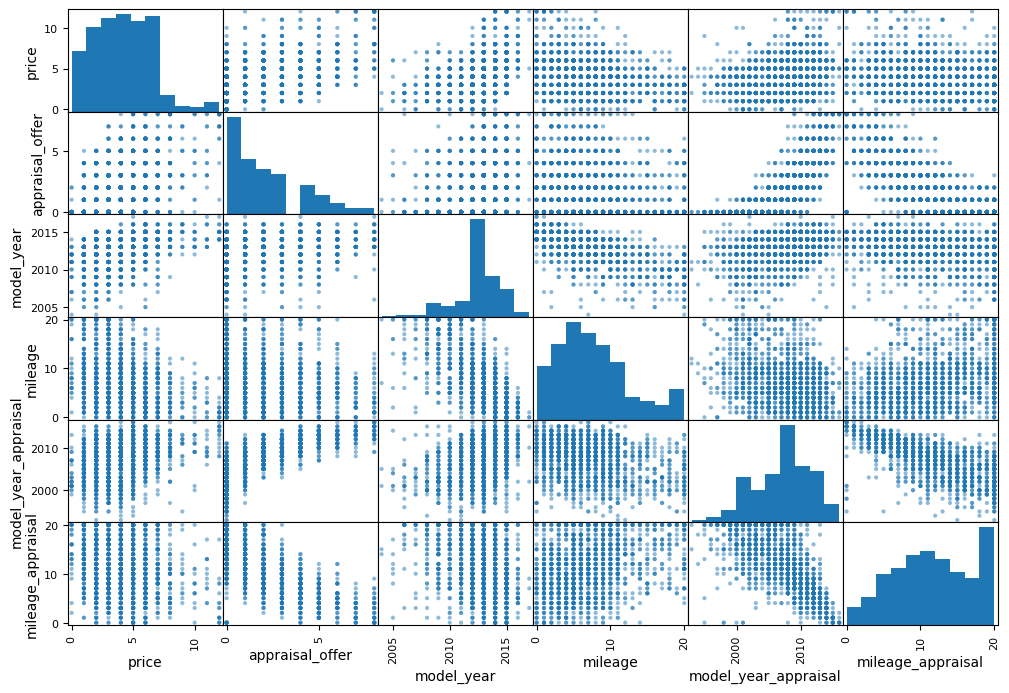

In [60]:
from pandas.plotting import scatter_matrix

AIH = 

attrib=["price","appraisal_offer","model_year","mileage","model_year_appraisal","mileage_appraisal"]
scatter_matrix(KQZ[attrib], figsize=(12,8))

# PREPROCESSING COLUMNS
- [x] price and appraisal_offer into numbers
- [x] online_appraisal_flag and model_year into ints
- [x] mileage into numbers
- [x] model contains same information as make so reduce
- [] make to be one-hot-encoded
- [x] model to be trimmed to number portion
- [] trim_descrip into boolean
- [] body one-hot-encoded
- [] color one-hot-encoded
- [] engine turned into a float, drop 'L'
- [] cylinders, mpg_city, mpg_highway, horsepower, fuel_capacity all good
- [] then come the _appraisal columns

## _appraisal columns describe the car that the customer brought-in for trade
## the non_appraisal columns describe the car that the customer purchased

# Supervised Problem
    - Given the vehicle that was brought into trade (_appraisal columns as features), can you predict the purchase price/mileage/model etc.
# Unsupervised Problem 
    - Calculate clusters for purchased and appraised cars and calculate their differences

In [43]:
import re

def getNumbers(col):
    first_list = [re.findall(r'\d+', i) for i in df[col]]
    second_list = [(int(i[0])+int(i[-1]))/2 for i in first_list]

    return second_list

def getMileage(col):
    mile_list = [re.findall(r'\d+', i) for i in df['mileage']]
    mile_list = [(int(i[0])+int(i[-1]))/2 if len(i)==2 else int(i[0]) for i in mile_list]
    
    return mile_list

df['price'] = getNumbers('price')
df['appraisal_offer'] = getNumbers('appraisal_offer')
df['online_appraisal_flag'] = df['online_appraisal_flag'].astype('int32')
df['model_year'] = df['model_year'].astype('int32')
df['mileage'] = getMileage('mileage')
purch_make = pd.get_dummies(df['make'], prefix='purch')
df['model'] = [int(re.findall(r'\d+',i)[0]) for i in df['model']]
df['trim_descrip'] = np.where(df['trim_descrip'] == 'Premium', 1, 0)
purch_body = pd.get_dummies(df['body'], prefix='purch')
purch_color = pd.get_dummies(df['color'], prefix='purch')
df['engine'] = [float(i.replace('L','')) for i in df['engine']]

In [44]:
import re

def getNumbers(col):
    first_list = [re.findall(r'\d+', i) for i in df[col]]
    second_list = [(int(i[0])+int(i[-1]))/2 for i in first_list]

    return second_list

def getMileage(col):
    mile_list = [re.findall(r'\d+', i) for i in df['mileage']]
    mile_list = [(int(i[0])+int(i[-1]))/2 if len(i)==2 else int(i[0]) for i in mile_list]
    
    return mile_list

price = getNumbers('price')
appraisal_offer = getNumbers('appraisal_offer')

concat_df = pd.DataFrame(
    price, appraisal_offer
)
concat_df
# df['online_appraisal_flag'] = df['online_appraisal_flag'].astype('int32')
# df['model_year'] = df['model_year'].astype('int32')
# df['mileage'] = getMileage('mileage')
# purch_make = pd.get_dummies(df['make'], prefix='purch')
# df['model'] = [int(re.findall(r'\d+',i)[0]) for i in df['model']]
# df['trim_descrip'] = np.where(df['trim_descrip'] == 'Premium', 1, 0)
# purch_body = pd.get_dummies(df['body'], prefix='purch')
# purch_color = pd.get_dummies(df['color'], prefix='purch')
# df['engine'] = [float(i.replace('L','')) for i in df['engine']]

TypeError: expected string or bytes-like object

# Concatenate a bunch of columns to make one new purchase_df 

In [ ]:
purch_df = pd.concat([
    df[['price','appraisal_offer','online_appraisal_flag','model_year','mileage']],
    purch_make,
    df[['model','trim_descrip']],
    purch_body,
    purch_color,
    df[['engine','cylinders','mpg_city','mpg_highway','horsepower','fuel_capacity']],
], axis=1)
purch_df

In [ ]:
purch_df.corr()

In [ ]:
# sns.histplot(np.log1p(purch_df['price']))
sns.histplot(purch_df['price'])

In [ ]:
import seaborn as sns

sns.heatmap(purch_df.corr())

# Apply a DT-based regression

## split data into train-test-valid


In [ ]:
target = purch_df['price']
data = purch_df.drop('price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume that you have a variable called 'data' that contains your dataset
# and a variable called 'target' that contains the labels for your dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
r2

In [ ]:
appraised = getNumbers('appraisal_offer')

In [ ]:
len(appraised)

In [ ]:
purch_df['price']

In [ ]:
plt.scatter(purch_df['price'], appraised, )

In [ ]:
importances = model.feature_importances_
# Get the indices of the sorted importances
sorted_indices = importances.argsort()[::-1]
# Get the names of the features
feature_names = list(data.columns)

# Create a bar plot
plt.bara(range(10), importances[sorted_indices[:10]])
plt.xticks(range(10), [feature_names[i] for i in sorted_indices[:10]], rotation=90)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a figure and set the size
fig = plt.figure(figsize=(8, 4))

# Add a subplot to the figure
ax = fig.add_subplot(1, 1, 1)

# Plot the r2 scores
ax.plot([0, 1], [train_r2, test_r2])


In [ ]:
mse

## create model, train, predict, validate

# Apply K-Means cluster on purch_df

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(purch_df)

In [ ]:
plt.scatter(x=purch_df['model_year'], y=purch_df['price'], c=kmeans.labels_)

In [ ]:
df['make'].unique()

In [ ]:
df.head()

In [ ]:
df.info()